##### 新潟大学大学院医歯学総合研究科　顎顔面放射線学分野　学生演習用
Modified by H.Nishiyama<br>
Fork from :https://github.com/oreilly-japan/deep-learning-from-scratch-5

```os.path.dirname(__file__)```<br>
はローカル実行環境ではエラーとなるので、<br>
```os.getcwd()```<br>
に修正した（オリジナルコードは```#=#```でコメントアウトしている）<br>
なお、ファイルの場所が同じフォルダ内なら、```os.path.join```も不要で、直接```np.loadtxt(path)```の```path```にファイル名（```'height_weight.txt'```）を入れるだけで良い。<br>
【注意】オリジナルコードとして同梱されている「notebooks」フォルダ内のコードをローカルで直接実行すると同一フォルダ内に該当するデータファイルが存在しないのでエラーが発生する。<br>

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#=# path = os.path.join(os.path.dirname(__file__), 'height_weight.txt')
path = os.path.join(os.getcwd(), 'height_weight.txt')
xs = np.loadtxt(path)

In [3]:
# Maximum Likelihood Estimation(MLE)
mu = np.mean(xs, axis=0)
cov = np.cov(xs, rowvar=False)

In [4]:
def multivariate_normal(x, mu, cov):
    det = np.linalg.det(cov)
    inv = np.linalg.inv(cov)
    d = len(x)
    z = 1 / np.sqrt((2 * np.pi) ** d * det)
    y = z * np.exp((x - mu).T @ inv @ (x - mu) / -2.0)
    return y

In [5]:
small_xs = xs[:500]
X, Y = np.meshgrid(np.arange(150, 195, 0.5),
                   np.arange(45, 75, 0.5))
Z = np.zeros_like(X)

for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        x = np.array([X[i, j], Y[i, j]])
        Z[i, j] = multivariate_normal(x, mu, cov)

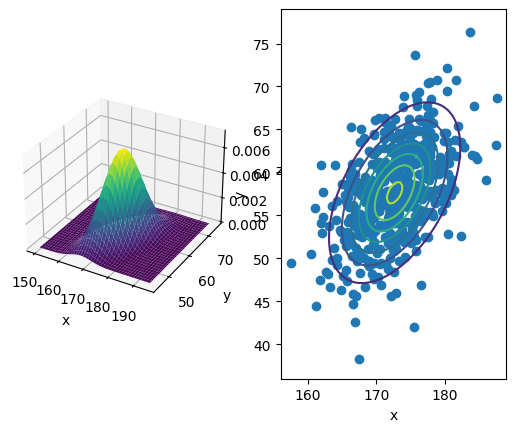

In [6]:
fig = plt.figure()
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('z')
ax1.plot_surface(X, Y, Z, cmap='viridis')

ax2 = fig.add_subplot(1, 2, 2)
ax2.scatter(small_xs[:,0], small_xs[:,1])
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_xlim(156, 189)
ax2.set_ylim(36, 79)
ax2.contour(X, Y, Z)
plt.show()